<img src=https://media.wired.com/photos/59328fcc5c4fbd732b5538f4/master/w_2560%2Cc_limit/bike-share-660.jpg width=200 align=right>


<h1><left>SF Area bikeshare analysis</left></h1>





# Index

## [- General Settings](#GeneralSettings) 

## [- Data Gatering](#DataGatering) 
    
 
## [- Data Assesing](#DataAssessing)
    
    
## [- Data Cleaning/Data Transforming](#DataCleaning/DataTransforming)
    
    
## [- Data Analysis](#DataAnalysis)
    

## [- Conclution](#Conclution)
    
    

<a id="GeneralSettings"></a>
# General Settings

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

<a id="DataGatering"></a>
# Data Gatering 


## Using a provided sqlite

In [2]:
#Getting bikes dataset from desktop
con = sqlite3.connect("D://Escritorio//Bike Files//database.sqlite")
cur = con.cursor()


In [3]:
#Checking which tables we have available for analysis
pd.read_sql_query('SELECT name FROM sqlite_master', con)

,name
0,station
1,status
2,trip
3,weather


In [4]:
#Checking the station table
pd.read_sql_query('SELECT * FROM station LIMIT 5', con)




,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [5]:
#Checking the status table
pd.read_sql_query('SELECT * FROM status LIMIT 5', con)

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [6]:
#Checking the trip table
pd.read_sql_query('SELECT * FROM trip LIMIT 5', con)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114
1,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703
2,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115
3,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122
4,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597


In [7]:
#Checking the weather table
pd.read_sql_query('SELECT * FROM weather LIMIT 5', con)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28,0,4,,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35,0,2,,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31,0,4,,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29,0,4,,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30,0,6,,277,94107


<a id="DataAssessing"></a>
#  Data Assessing


## Visual Assesing 

In [8]:
#Checking the size of every db
pd.read_sql_query('SELECT COUNT(*) FROM station', con)

,COUNT(*)
0,70


In [9]:
#Checking the size of every db
pd.read_sql_query('SELECT COUNT(*) FROM status', con)

,COUNT(*)
0,71984434


In [10]:
#Checking the size of every db
pd.read_sql_query('SELECT COUNT(*) FROM trip', con)

,COUNT(*)
0,669959


In [11]:
#Checking the size of every db
pd.read_sql_query('SELECT COUNT(*) FROM weather', con)

,COUNT(*)
0,3665



## Programmatically Assesing

In [12]:
#Converting the smallers tables into df
station_df = pd.read_sql_query('SELECT * FROM station', con)
trip_df = pd.read_sql_query('SELECT * FROM trip', con)
weather_df =pd.read_sql_query('SELECT * FROM weather', con)

In [13]:
#Getting dtype and null information from station
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70 non-null     int64  
 1   name               70 non-null     object 
 2   lat                70 non-null     float64
 3   long               70 non-null     float64
 4   dock_count         70 non-null     int64  
 5   city               70 non-null     object 
 6   installation_date  70 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB


In [14]:
#Getting dtype and null information from trip
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  669959 non-null  int64 
 1   duration            669959 non-null  int64 
 2   start_date          669959 non-null  object
 3   start_station_name  669959 non-null  object
 4   start_station_id    669959 non-null  int64 
 5   end_date            669959 non-null  object
 6   end_station_name    669959 non-null  object
 7   end_station_id      669959 non-null  int64 
 8   bike_id             669959 non-null  int64 
 9   subscription_type   669959 non-null  object
 10  zip_code            669959 non-null  object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


In [15]:
#Getting dtype and null information from weather
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   date                            3665 non-null   object
 1   max_temperature_f               3665 non-null   object
 2   mean_temperature_f              3665 non-null   object
 3   min_temperature_f               3665 non-null   object
 4   max_dew_point_f                 3665 non-null   object
 5   mean_dew_point_f                3665 non-null   object
 6   min_dew_point_f                 3665 non-null   object
 7   max_humidity                    3665 non-null   object
 8   mean_humidity                   3665 non-null   object
 9   min_humidity                    3665 non-null   object
 10  max_sea_level_pressure_inches   3665 non-null   object
 11  mean_sea_level_pressure_inches  3665 non-null   object
 12  min_sea_level_pressure_inches   3665 non-null   

### Gatering and asessing comments
- There is no null values in the tables weather, trip or station
- The "status" table is so big that would be better to analyze it with some tools that can work with SQL. It would need a "manual analysis"
- Taking in consideration that 3 of 4 tables has no nulls. We are going to assume that the table "status" has the same behaviour
- The temperature are on farenheit so we will need to covnert it for a better understanding.
- There is two types of suscripiption_type. We are going to focus in the "suscriber" type because that is the one that we do not want to lose as a client.
- There is 2 "rain" events. we need to standarize that
- So many variables are in object format when they need to be in integer or float format. We need to change the format of the ones that are we going to use in our analysis


<a id="DataCleaning/DataTransforming"></a>
# Data Cleaning/Data Transforming

## Weather Table

In [16]:
#Making copies of the original dataframe
weather_clean = weather_df.copy()


### Fixing events

In [17]:
#Fixing the Rain event
weather_clean["events"] = weather_clean["events"].str.replace("rain","Rain")
weather_clean["events"].value_counts()

                     3143
Rain                  390
Fog                   112
Fog-Rain               17
Rain-Thunderstorm       3
Name: events, dtype: int64

### Fixing temperatures

In [18]:
#Changing the type of variable from the temperatures
weather_clean[['max_temperature_f', 'min_temperature_f','mean_temperature_f']] = weather_clean[['max_temperature_f', 'min_temperature_f','mean_temperature_f']].apply(pd.to_numeric)

#Generating a temperature value in celsius
weather_clean["max_temp_c"] = (weather_clean['max_temperature_f'] - 32)*(5/9)
weather_clean["min_temp_C"] = (weather_clean['min_temperature_f'] - 32)*(5/9)
weather_clean["mean_temp_C"] = (weather_clean['mean_temperature_f'] - 32)*(5/9)

#Converting the temperature in a value with just two decimals
weather_clean[["max_temp_c","min_temp_C","mean_temp_C"]] = weather_clean[["max_temp_c","min_temp_C","mean_temp_C"]].round(2)


### Fixing precipitations

In [19]:
#Checking the values for precipitation
weather_clean["precipitation_inches"].value_counts()

0       3231
T        143
0.01      65
0.02      29
0.03      13
        ... 
0.4        1
1.28       1
3.36       1
1.43       1
1.85       1
Name: precipitation_inches, Length: 86, dtype: int64

In [20]:
#Droping the rows where prcipitations = "T". 
#We do that because it just mean to drop the 3% of or data. Is not significant for our analysis
#And it is better than guess which number goes there
weather_clean = weather_clean[weather_clean["precipitation_inches"] != "T"]

#Erasing the one row that does not have a precipitation value
weather_clean = weather_clean[weather_clean["precipitation_inches"] != '']

weather_clean["precipitation_inches"] = weather_clean["precipitation_inches"].astype(float)

### Fixing date format

In [21]:
weather_clean['date'] = pd.to_datetime(weather_clean['date'])

<a id="DataAnalysis"></a>
## Data Analysis

#### Scope
- Taking in consideration that the NPS variable is not available in the tables the first call would be to ask for this variable to improve the analysis. 
- Taking in consideration This is just and example case. We are going to crete hypothesis to try to find varaiubles that could affect a NPS

- We are going to check 4 Hypothesis:
    * 1.- In the later months the heat has growth and the people is not confortable with that affecting the NPS
    * 2.- In the later months the precipitations have growth and the people is not confortable with that affecting the NPS
    * 3.- There are stations with less docks and people is not confortable with that affecting the NPS
    * 4.- The stations are far from each other and people is not confortable with that affecting the NPS
    
- Extra Analysis
    * Would be interesting to know the diferent behaviur for customers and suscribers
    * Would be interesting to know which ones are the most popular routes

#### Analyzing if the temperature could be affecting the NPS

In [22]:
#Creating a new df to use in the graph
to_graph  = weather_clean.groupby(by="date")["mean_temp_C"].mean()

#Cleaning the indexes
temperature = pd.DataFrame(to_graph).reset_index()

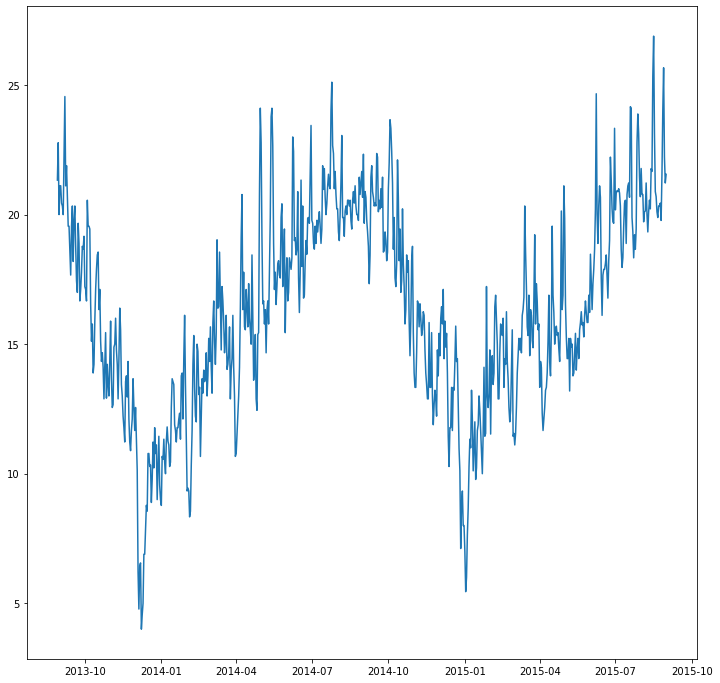

In [24]:
#Generating a line chart for the temperature
plt.figure(figsize=(12,12))

X = temperature["date"]
Y = temperature["mean_temp_C"]

plt.plot(X, Y)
plt.show()

#### Analyzing if the precipitations could be affecting the NPS

In [25]:
#Creating a new df to use in the graph
to_graph  = weather_clean.groupby(by="date")["precipitation_inches"].mean()

#Cleaning the indexes
precipitation = pd.DataFrame(to_graph).reset_index()

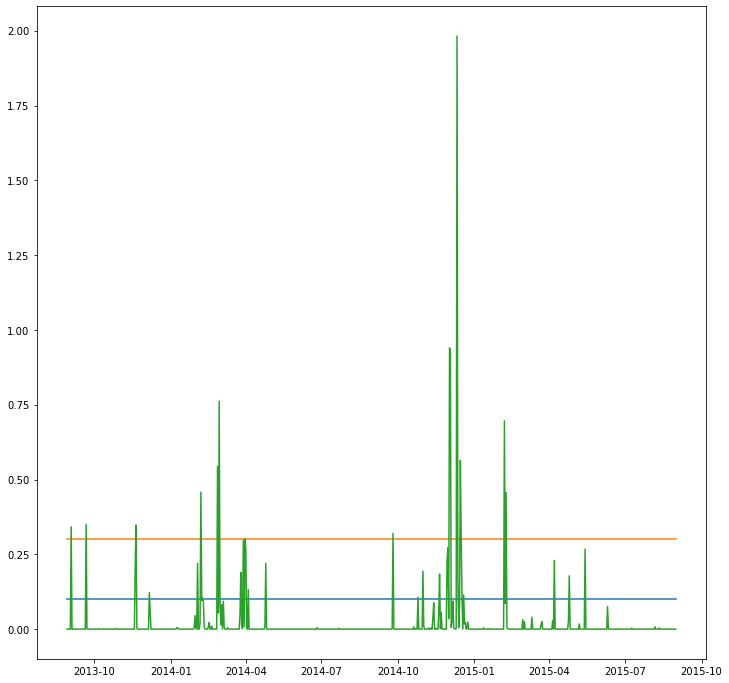

In [103]:
#Generating a line chart for the precipitations
plt.figure(figsize=(12,12))

X = precipitation["date"]
Y = precipitation["precipitation_inches"]

x = ["2013-08-29","2015-08-31"]

#Creating lines to define difrent clasifications for rain
y = [0.3] * 733
y1 = [0.1] * 733

plt.plot(X,y1)
plt.plot(X,y)
plt.plot(X, Y)
plt.show()

#Rainfall rate is generally described as light, moderate or heavy. 
#Light rainfall is considered less than 0.10 inches of rain per hour. 
#Moderate rainfall measures 0.10 to 0.30 inches of rain per hour. 
#Heavy rainfall is more than 0.30 inches of rain per hour. 

#### Analyzing if the number of docks could be affecting the NPS

In [28]:
#Defining the conditions for the colors
conditions = [
    (station_df["city"] == 'San Francisco'),
    (station_df["city"] == 'San Jose'),
    (station_df["city"] == 'Redwood City'),
    (station_df["city"] == 'Mountain View'),
    (station_df["city"] == 'Palo Alto')
    ]

values = ['powderblue', 'lightcoral', 'moccasin', 'mediumblue',"lightsteelblue"]

# create a new column and use np.select to assign values to it using our lists as arguments
station_df['colors'] = np.select(conditions, values)

# display updated DataFrame
station_df.head()

,id,name,lat,long,dock_count,city,installation_date,colors
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,lightcoral
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,lightcoral
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,lightcoral
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,lightcoral
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,lightcoral


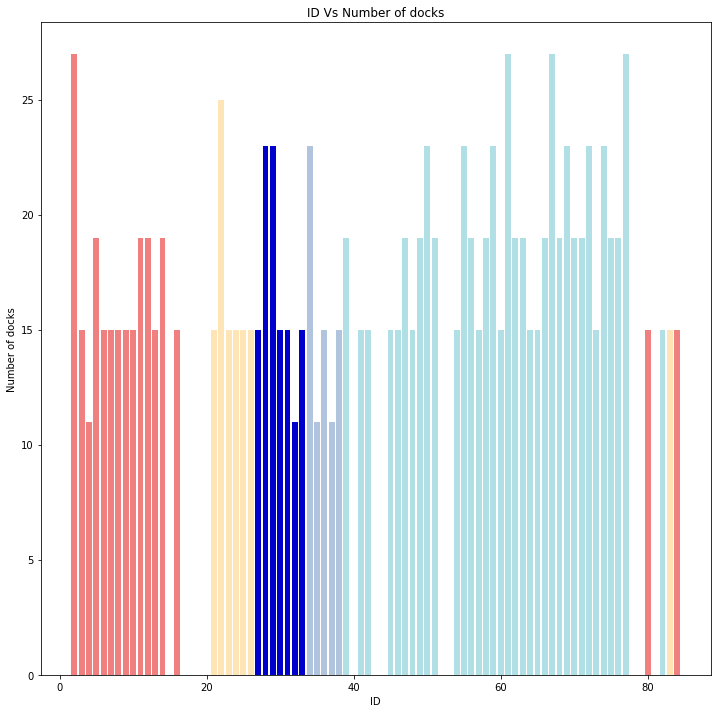

In [29]:
#Generating a bar chart for the number of docks
plt.figure(figsize=(12,12))

c = station_df['colors']

#Creating the chart
plt.bar(station_df["id"], station_df["dock_count"], color = c)

plt.title('ID Vs Number of docks')
plt.xlabel('ID')
plt.ylabel('Number of docks')
plt.show()

#### Analyzing if the number of docks could be affecting the NPS

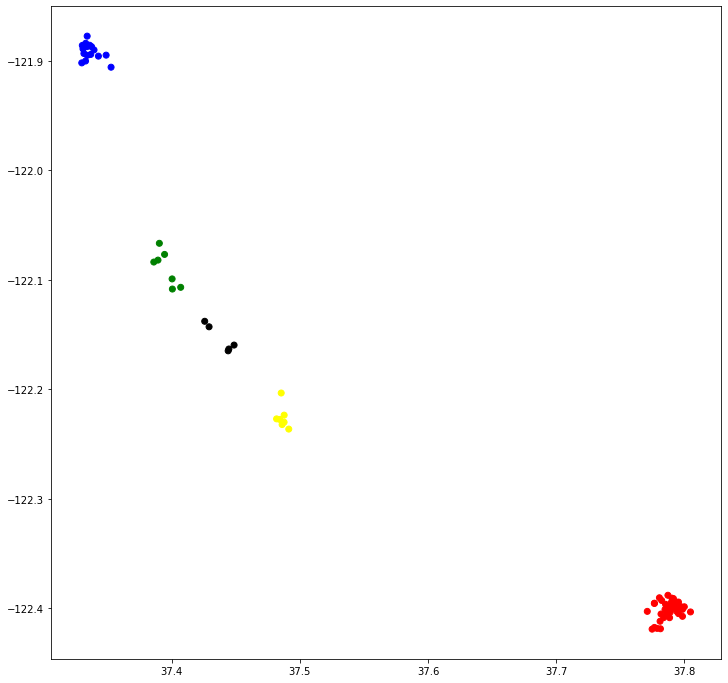

In [37]:
#defiining colors for the graph
values = ["red","blue","yellow","green","black"]

station_df['colors'] = np.select(conditions, values)

cr = station_df['colors']

#Creating the chart
plt.figure(figsize=(12,12))
plt.scatter(station_df["lat"], station_df["long"], color = cr)
plt.show()

#### Analyzing the number of travels per client

<AxesSubplot:xlabel='duration', ylabel='id'>

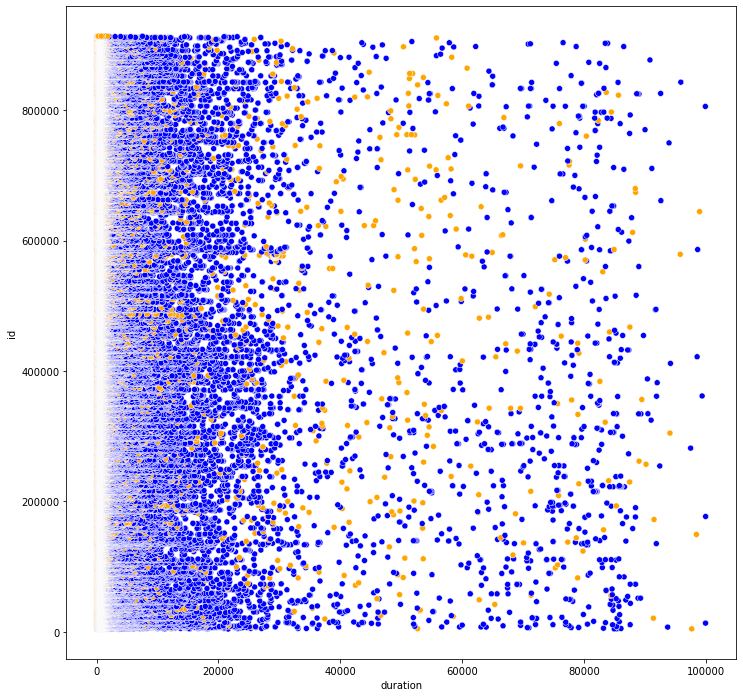

In [104]:
#Remomving duration outliers
trip_df = trip_df[trip_df["duration"]<= 1000000]

#Defining colors for Subscription_type
colors = {"Subscriber":'orange', "Customer":"blue"}

#Creating the chart
plt.figure(figsize=(12,12))
sns.scatterplot(data = trip_df, x = "duration", y = "id",c=trip_df["subscription_type"].map(colors))


In [66]:
#Checking some stadistics for the numeric variables in trip 
trip_df.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669736.000000,669736.000000,669736.000000,669736.000000,669736.000000
mean,460391.564261,997.112204,57.857026,57.842144,427.605253
std,264580.863491,3392.945318,17.107740,17.195636,153.423226
min,4069.000000,60.000000,2.000000,2.000000,9.000000
25%,231117.750000,344.000000,50.000000,50.000000,334.000000
50%,459279.500000,517.000000,62.000000,62.000000,440.000000
75%,692610.250000,755.000000,70.000000,70.000000,546.000000
max,913460.000000,99993.000000,84.000000,84.000000,878.000000


In [77]:
#Creating 2 df to analyze different behaviur between Subscriber and Customer
sus_info = trip_df[trip_df["subscription_type"] == "Subscriber"]
cus_info = trip_df[trip_df["subscription_type"] == "Customer"]

In [78]:
#Checking some stadistics for Customers
cus_info.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,103023.000000,103023.000000,103023.000000,103023.000000,103023.000000
mean,403539.649816,3325.337556,55.752162,56.128952,425.040389
std,278648.186234,7584.911412,17.278380,17.270210,156.290112
min,4078.000000,60.000000,2.000000,2.000000,9.000000
25%,150473.000000,657.000000,48.000000,48.000000,330.000000
50%,371745.000000,1114.000000,60.000000,60.000000,439.000000
75%,645687.500000,2309.000000,70.000000,70.000000,546.000000
max,913453.000000,99993.000000,84.000000,84.000000,878.000000


In [79]:
#Checking some stadistics for Suscribers
sus_info.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,566713.000000,566713.000000,566713.000000,566713.000000,566713.000000
mean,470726.698239,573.863116,58.239670,58.153586,428.071521
std,260613.847167,1407.773263,17.048659,17.163700,152.891797
min,4069.000000,60.000000,2.000000,2.000000,9.000000
25%,244314.000000,323.000000,50.000000,50.000000,334.000000
50%,476115.000000,475.000000,62.000000,63.000000,441.000000
75%,698281.000000,666.000000,70.000000,70.000000,546.000000
max,913460.000000,99002.000000,84.000000,84.000000,878.000000


#### Analyzing most popular routes 

,estacion_inicial,estacion_final,sum,qtd
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,1972347,6216
2,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),1437680,5041
3,2nd at Townsend,Harry Bridges Plaza (Ferry Building),2821533,4839
4,Harry Bridges Plaza (Ferry Building),2nd at Townsend,2913319,4357
5,Embarcadero at Sansome,Steuart at Market,2316082,4269
...,...,...,...,...
95,Harry Bridges Plaza (Ferry Building),Townsend at 7th,1351522,1284
96,2nd at South Park,San Francisco Caltrain 2 (330 Townsend),541142,1283
97,San Antonio Shopping Center,San Antonio Caltrain Station,620410,1278
98,San Jose Diridon Caltrain Station,San Pedro Square,570710,1274


<function matplotlib.pyplot.show(close=None, block=None)>

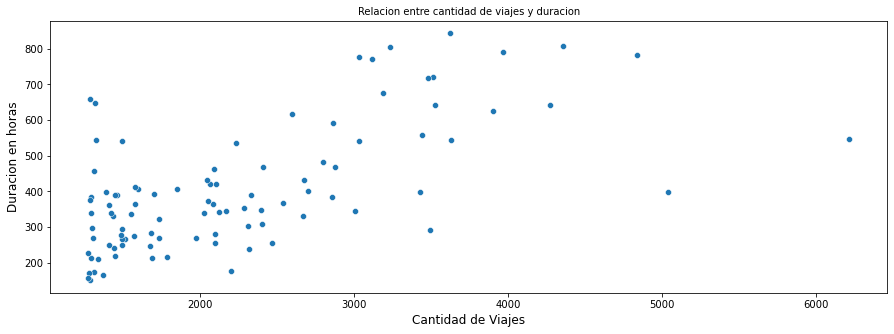

In [89]:
#Generating a query for and eaiser dataframe construction
query='''
SELECT a.start_station_name as estacion_inicial, a.end_station_name as estacion_final, SUM(a.duration) AS sum, COUNT(*) AS qtd
FROM trip a
LEFT JOIN station b
ON (a.start_station_name=b.id)
GROUP BY a.start_station_name, a.end_station_name
ORDER BY 4 DESC
LIMIT 100;
'''
info = pd.read_sql_query(query, con)
info = info[(info["sum"] <=6000000 )]
display(info)

info["sum"] = info["sum"]/3600

plt.figure(figsize=(15,5))
sns.scatterplot(data=info, y='sum', x='qtd')
plt.title('Relacion entre cantidad de viajes y duracion', fontsize = 10)
plt.ylabel('Duracion en horas', fontsize = 12)
plt.xlabel('Cantidad de Viajes', fontsize = 12)
plt.show

In [105]:
#Defining the most popular routes by the one with more than 500 min as duration and with more thant 3000 travels
most_popular = info.loc[(info["sum"]>= 500 ) & (info["qtd"]>= 3000)]

#Sorting the routes by the most popular to the less popular
most_popular.sort_values(by = ["sum","qtd"],ascending = [False,False])

,estacion_inicial,estacion_final,sum,qtd
9,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),843.393889,3622
4,Harry Bridges Plaza (Ferry Building),2nd at Townsend,809.255278,4357
16,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),806.449167,3231
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),790.079722,3967
3,2nd at Townsend,Harry Bridges Plaza (Ferry Building),783.759167,4839
19,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),777.157500,3033
18,Steuart at Market,Embarcadero at Sansome,771.802778,3116
11,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),720.375000,3510
13,Steuart at Market,San Francisco Caltrain (Townsend at 4th),717.490278,3477
17,Market at 10th,San Francisco Caltrain (Townsend at 4th),675.338889,3190


<a id="Conclution"></a>
# Conclution 